# Pymaceuticals Inc.
## Ashok Goyal
---

### Analysis

- Capomulin is the only drug that reduced the tumor volume over the period of 45 days. All other drugs increased the tumor volume.
- There is a strong correlation ($\iff n \gt 0.7 \ \& \ n \in \mathbb{N}^+$) between mice weight and tumor volume, being 0.84.  
    - And this makes sense, considering that tumors of larger mice should be larger than those of smaller mice.
    - But this also means that a mouse's natural size could be a confounding factor in any analysis of the drug's effect on tumor size, since the drug's effect on tumor size could be smaller than the effect of the mouse's size on tumor size.

In [59]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
study_data_complete = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
study_data_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [60]:
# Checking the number of mice.
len(study_data_complete["Mouse ID"].value_counts())

249

In [61]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = study_data_complete.loc[study_data_complete.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [62]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_data = study_data_complete.loc[study_data_complete["Mouse ID"] == "g989", :]
duplicate_mice_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [63]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_study_data_complete = study_data_complete[study_data_complete["Mouse ID"].isin(duplicate_mice)==False]
clean_study_data_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [64]:
# Checking the number of mice in the clean DataFrame.
len(clean_study_data_complete["Mouse ID"].value_counts())

248

## Summary Statistics

In [65]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regim

regimen_groupby = clean_study_data_complete.groupby("Drug Regimen")
mean_tumor_volume = regimen_groupby["Tumor Volume (mm3)"].mean()
median_tumor_volume = regimen_groupby["Tumor Volume (mm3)"].median()
variance_tumor_volume = regimen_groupby["Tumor Volume (mm3)"].var()
std_tumor_volume = regimen_groupby["Tumor Volume (mm3)"].std()
sem_tumor_volume = regimen_groupby["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame

drug_summary = pd.DataFrame(
    {
        "Mean Tumor Volume": mean_tumor_volume,
        "Median Tumor Volume": median_tumor_volume,
        "Variance Tumor Volume": variance_tumor_volume,
        "Standard Deviation Tumor Volume": std_tumor_volume,
        "SEM Tumor Volume": sem_tumor_volume
    }
)    
                      
drug_summary

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Deviation Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [66]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen is using the aggregation method
drug_summary_agg = regimen_groupby.agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})
drug_summary_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

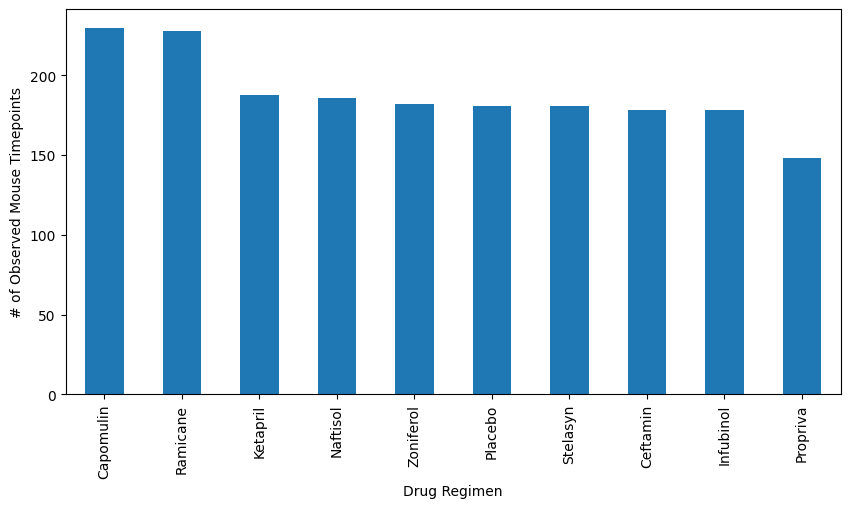

In [67]:
# Use the Pandas DataFrame.plot() method to create a bar chart that shows the total number of rows for each drug regimen

regimen_count = regimen_groupby["Timepoint"].count()
regimen_count = regimen_count.sort_values(ascending=False)
regimen_graph = regimen_count.plot(kind="bar", figsize=(10,5))
regimen_graph.set_ylabel("# of Observed Mouse Timepoints")
regimen_graph

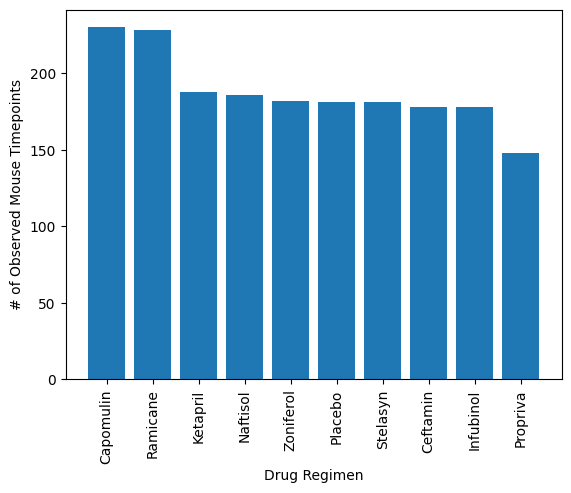

In [68]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(regimen_count.index, regimen_count)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=90)
plt.show()

<Axes: ylabel='Sex'>

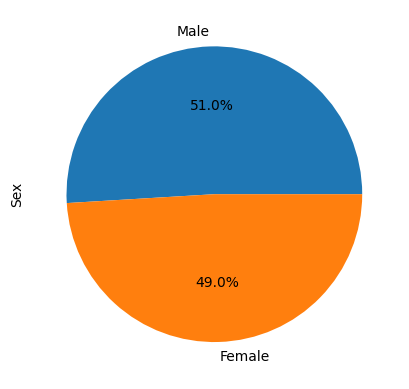

In [69]:
# Generate a pie plot showing the distribution of female versus male mice using DataFrame.plot().
mouse_sex = clean_study_data_complete["Sex"].value_counts()
mouse_sex.plot(kind="pie", autopct="%1.1f%%", ylabel="Sex")

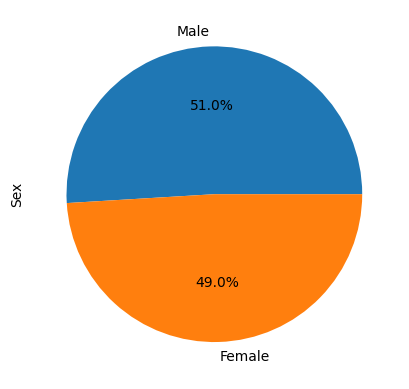

In [70]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
counts = mouse_sex.values
plt.pie(counts, labels=labels, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [71]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
id_groupby = clean_study_data_complete.groupby(by = "Mouse ID")
max_timepoint = id_groupby["Timepoint"].max()
max_timepoint = max_timepoint.to_frame()
max_timepoint.columns = ["Max Timepoint"]
max_timepoint_reset = max_timepoint.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
with_original = pd.merge(clean_study_data_complete, max_timepoint, how = 'inner', on = "Mouse ID")
final_tumor = with_original.loc[with_original["Timepoint"] == with_original["Max Timepoint"]]

In [72]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = final_tumor.loc[final_tumor["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    tumor_vol_data.append(tumor_vol)
    
    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outlier = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    print(f"{treatment}'s potential outliers: {outlier}")
    print(f"{treatment}'s IQR for tumor volumes: {iqr}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Capomulin's IQR for tumor volumes: 7.781863460000004
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's IQR for tumor volumes: 9.098536719999998
Infubinol's potential outliers: 669    36.321346
Name: Tumor Volume (mm3), dtype: float64
Infubinol's IQR for tumor volumes: 11.477135160000003
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin's IQR for tumor volumes: 15.577752179999997


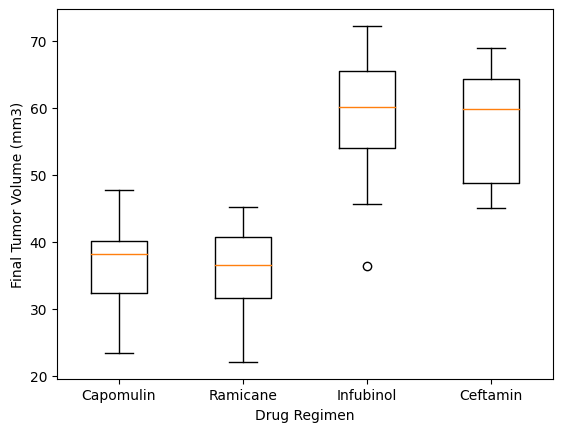

In [73]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data, labels=treatments)
plt.ylabel("Final Tumor Volume (mm3)")
plt.xlabel("Drug Regimen")
plt.show()

## Line and Scatter Plots

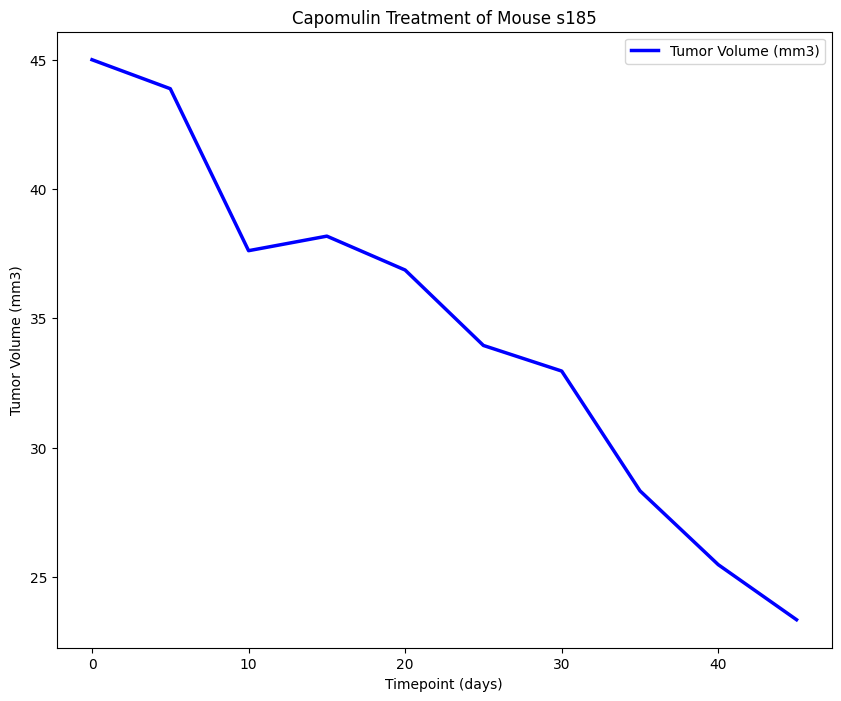

In [74]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_data = clean_study_data_complete.loc[clean_study_data_complete["Drug Regimen"] == "Capomulin"]
capomulin_data = capomulin_data.reset_index()
capomulin_data = capomulin_data.loc[capomulin_data["Mouse ID"] == "s185"]
capomulin_data = capomulin_data.loc[:, ["Timepoint", "Tumor Volume (mm3)"]]
capomulin_data = capomulin_data.reset_index(drop=True)
capomulin_data.set_index("Timepoint").plot(figsize=(10,8), linewidth=2.5, color="blue")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint (days)")
plt.title("Capomulin Treatment of Mouse s185")
plt.show()

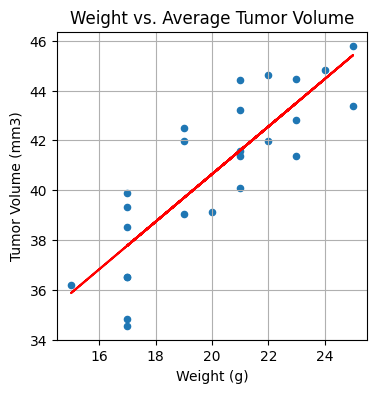

In [75]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_study_data_complete.loc[clean_study_data_complete["Drug Regimen"] == "Capomulin"]
capomulin_data = capomulin_data.loc[:, ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
capomulin_data = capomulin_data.groupby(["Mouse ID", "Weight (g)"])
capomulin_data = capomulin_data["Tumor Volume (mm3)"].mean()
capomulin_data = capomulin_data.reset_index()
capomulin_data.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", grid=True, figsize=(4,4), title="Weight vs. Average Tumor Volume")
# Draw the line of best fit
x_values = capomulin_data["Weight (g)"]
y_values = capomulin_data["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values, regress_values, "r-")
plt.show()

## Correlation and Regression

In [76]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
weight = capomulin_data.iloc[:,1]
tumor_volume = capomulin_data.iloc[:,2]
correlation = st.pearsonr(weight,tumor_volume)
print(f"{round(correlation[0],2)} is the correlation between mouse weight and average tumor volume for the Capomulin regimen.")

0.84 is the correlation between mouse weight and average tumor volume for the Capomulin regimen.
